In [2]:
from scipy import sparse
import csv
import sys
import os
import pandas
import numpy as np
import multiprocessing
import random
from sklearn.externals import joblib
import sklearn.ensemble  

In [37]:
X = []
Y = []
f1=open(unicode('./datasetPersonTab'))
f2=open(unicode('./datasetNNPTab'))
for i, line in enumerate(f1):
    if (i == 0):
        continue
    X.append(line.strip().split('\t')[1])
    Y.append('Person')
size = len(X)
for i, line in enumerate(f2):
    if (i == 0):
        continue
    X.append(line.strip().split('\t')[1])
    Y.append('No')

In [154]:
X_test = []
Y_test = []
f1=open(unicode('./datasetPersonTabTest'))
f2=open(unicode('./datasetNNPTabTest'))
for i, line in enumerate(f1):
    if (i == 0):
        continue
    X_test.append(line.strip().split('\t')[4:])
    Y_test.append('Person')
for i, line in enumerate(f2):
    if (i == 0):
        continue
    X_test.append(line.strip().split('\t')[4:])
    Y_test.append('No')

In [5]:
filename = './DiplomaDataPerson_X_int.joblib.pkl'
X_int = joblib.load(filename)
filename = './DiplomaDataPerson_X_int_test.joblib.pkl'
X_int_test = joblib.load(filename)

#96945
#46849

In [123]:
filename = './DiplomaDataPerson_enc.joblib.pkl'
enc = joblib.load(filename)

In [151]:
filename = './DiplomaDataPerson_RF50_200000.joblib.pkl'
RF_old = joblib.load(filename)

In [98]:
Y_new_pr = RF_old.predict_proba(enc.transform(X_int))

In [105]:
for i in range(len(Y)):
    if Y_new_pr[i][1]>0.9:
        if (i > 100000):
        Y[i]='Person'

104973
104974
168135
185110
200504
200621
200624
200642
200828
200902
200906
201385
201386
201402
201406
201410
201468
201566
201571
201826
202084
202202
202212
202216
202222
202328
202331
202341
202408
202469
202509
202521
202522
202549
202660
202754
202784
202823
202827
203113
203177
203283
203326
203343
203389
203391
203395
203400
203423
203435
203460
203562
203563
203578
203721
203746
203835
203862
203864
203908
204043
204156
204287
204345
204357
204510
204523
204597
204607
204623
204653
204657
204705
204752
204767
204783
204787
204789
204790
204798
204835
204866
204885
204886
204947
205072
205077
205086
205089
205098
205101
205218
205242
205301
205344
205469
205475
205496
205500
205507
205522
205555
205626
205634
205639
205643
205691
205692
205724
205739
205748
205787
205829
205842
205892
205896
205901
205902
205975
205979
205999
206004
206016
206046
206047
206069
206119
206128
206140
206144
206183
206268
206377
206456
206457
206516
206746
206753
206758
206762
206770
206774
206976

In [141]:
recall_set = dict()
presision_set = dict()
F_measure_set = dict()

In [142]:
from matplotlib import rc
 
font = {'family': 'Droid Sans',
        'weight': 'normal'}
rc('font', **font)

In [163]:
def metrics(size_X):
    Y_test_result =RF_old.predict_proba(enc.transform(X_int_test[:size_X]))
    f_n = 0
    f_p = 0
    t_n=0
    t_p=0
    #f = open('f_p_X_train_2', 'w')
    for i, y in enumerate(Y_test_result):
        y_t = 'No'
        if (i < 46849):
            y_t = 'Person'
        y_str = 'No'
        if y[1]>0.5:
            y_str = 'Person'
    #         f.write(str(i))
    #         f.write(',')
    #         f.write(X[i])
    #         f.write(',')
    #         f.write(str(y[1]))
    #         f.write('\n')
        if y_str != y_t:
            if y_str=='No':
                f_n+=1
                if Y_new_pr[i][1]>0.5 and y[1]<0.5:
                    print X_test[i][1]
                    print Y_new_pr[i][1], y[1] 
            else:
                f_p+=1

        elif y_str =='No':
            t_n+=1
        else:
            t_p+=1
    recall = t_p*1./(t_p+f_n+1)
    presision = t_p*1./(t_p+f_p+1)
    print recall
    print presision
    print f_p, f_n, t_p, t_n
    F_measure = 2*presision*recall/(presision+recall)
    print F_measure   
    recall_set[len(Y_test_result)] = recall
    presision_set[len(Y_test_result)] = presision
    F_measure_set[len(Y_test_result)] = F_measure
    #f.close()

In [160]:
i = 50000
while i < len(X_int_test):
    metrics(i)
    i += 10000 

KeyboardInterrupt: 

In [164]:
metrics(50000)

Neil
0.94 0.46
Trevor-Rop
0.96 0.46
Simpson
1.0 0.3
Peter
0.9 0.12
Neil
0.96 0.28
Barak
0.94 0.24
Ami
0.98 0.26
Yitzhak
1.0 0.38
Ayalon
0.88 0.44
Helena
0.74 0.42
André-Jacqu
0.9 0.48
Pomerania
0.84 0.05
Margaret
0.86 0.44
Bohemia
0.86 0.31
England
0.8 0.337777777778
Ann
0.64 0.27
Clement
0.96 0.08
Pole
1.0 0.2
Visconti
0.94 0.34
Ann
0.94 0.28
Valoi
0.88 0.32
Ann
0.68 0.48
Spain
0.88 0.444666666667
Thoma
0.98 0.391666666667
Francisco
0.96 0.44
Antonio
0.8 0.42
Santand
1.0 0.18
Young
0.98 0.3
Parri
0.98 0.26
Bulfinch
0.9 0.3
Ingraham
0.82 0.28
Joseph
0.9 0.319111111111
Blackfan
0.82 0.18
Ruggl
1.0 0.32
Church
0.98 0.307619047619
Salisburi
0.94 0.22
Sampson
0.9 0.32
Sampson
0.98 0.32
Arthur
0.88 0.42
Brizeux
0.88 0.2
Hemon
0.88 0.36
August
0.82 0.48
Space
1.0 0.4
Space
0.9175 0.06
Ghost
0.92 0.28
Space
0.88 0.48
Space
1.0 0.44
Space
0.86 0.44
Zorak
0.94 0.38
Brak
0.96 0.32
Space
1.0 0.4
Brak
0.88 0.286666666667
Brak
0.96 0.37
Brak
0.98 0.38
Brak
0.92 0.16
Ghost
0.94 0.2
Brak
0.94 0.14
Sp

In [146]:
print recall
print presision
print f_p, f_n, t_p, t_n
F_measure = 2*presision*recall/(presision+recall)
print F_measure   

0.858207043757
0.42973183844
53355 6642 40207 185891
0.572696260318


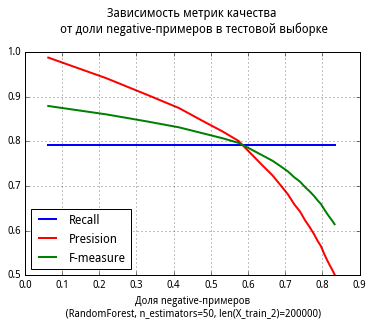

In [147]:
# -*- coding: utf-8 -*-
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt

def save(name=''):
    plt.savefig('./pictures/'+ name, fmt='png')
    #plt.close()

import numpy as np
l=['Recall' , 'Presision' , 'F-measure']

# Пример функции с объединением в кортеж *args
def f_sums(*args):

    list1 = []
    for arg in args:
        a = 0
        for i in arg:
            a += i
        list1.append(a)

    return list1


# Пример функции с объединением и в кортеж args и в словарь **kwargs
def f_plot(*args, **kwargs):

    xlist = []
    ylist = []
    for i, arg in enumerate(args):
        if(i % 2 == 0):
            xlist.append(arg)
        else:
            ylist.append(arg) 
    
    colors = kwargs.pop('colors', 'k')
    linewidth = kwargs.pop('linewidth', 1.)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    i = 0
    for x, y, color in zip(xlist, ylist, colors):
        i += 1
        ax.plot(x, y, color=color, linewidth=linewidth, label=l[i-1])
    
    ax.grid(True)
    #ax.legend()
    plt.legend(loc=3,prop={'size':12})
    plt.title(u'Зависимость метрик качества\n от доли negative-примеров в тестовой выборке\n')
    plt.xlabel(u'Доля negative-примеров\n (RandomForest, n_estimators=50, len(X_train_2)=200000)')
    save(u'Зависимость метрик качества от доли negative-примеров в тестовой выборке 2')
    

x = []
y1 =[]
y2 =[]
y3 =[]

keys = F_measure_set.keys()
keys.sort()
for x_ in keys:
    if x_>46850:
        x.append((x_ - 46850)*1./x_)
        y1.append(recall_set[x_])
        y2.append(presision_set[x_])
        y3.append(F_measure_set[x_])

    
f_plot(x , y1, x, y2, x , y3, colors=['blue', 'red', 'green'], linewidth=2.)

In [83]:
f =  pr.values()
f.sort()
print f

[0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702, 0.8582070437566702]


In [81]:
filename = './DiplomaDataPerson_GrX.pkl'
GrX = joblib.load(filename)
filename = './DiplomaDataPerson_GrRec.pkl'
GrRec = joblib.load(filename)
filename = './DiplomaDataPerson_GrPre.pkl'
GrPre = joblib.load(filename)
filename = './DiplomaDataPerson_GrF.pkl'
GrF = joblib.load(filename)

In [133]:

f_old = GrF
f_old.sort()
print f_old

[0.5825507288843309, 0.5882779384676841, 0.5968119596541788, 0.6050489218923567, 0.6253558341066008, 0.6383111931612956, 0.6480434180289127, 0.6595779974786014, 0.6703079957517829, 0.6816732384707698, 0.7072005976042472, 0.7234650339789486, 0.7381787802840435, 0.7529540978639601, 0.7861753976649234, 0.8047603145207809, 0.8179798395391895, 0.8519454919437778, 0.9117947189194767]


In [135]:
x_old = GrX
x_old.sort()
print x_old

[0.063, 0.414375, 0.5315, 0.5740909090909091, 0.6095833333333334, 0.6653571428571429, 0.6876666666666666, 0.7071875, 0.7244117647058823, 0.753421052631579, 0.76575, 0.7769047619047619, 0.7870454545454545, 0.796304347826087, 0.8047916666666667, 0.8198076923076923, 0.8264814814814815, 0.8326785714285714, 0.8362432059281008]


In [115]:
print len(X_train)

231654


In [113]:
count_no=0
import random
X_train = []
Y_train =[]
for i in range(len(X_int)):
    y = random.uniform(0, 1)
    if Y[i] == 'Person':
        X_train.append(X_int[i])
        Y_train.append('Person')
    elif y >0.75:
        count_no+=1
        X_train.append(X_int[i])
        Y_train.append('No') 

In [116]:
X_sparse_matrix = enc.transform(X_train)

In [117]:
import sklearn.ensemble  
RF = sklearn.ensemble.RandomForestClassifier(n_estimators=50, n_jobs=3)
RF.fit(X_sparse_matrix, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
filename = './DiplomaDataPerson_RF50_200000_data2.joblib.pkl'
enc = joblib.dump(RF, filename, compress=3)